In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('household-electric-power-consumption.zip', compression='zip', sep=';')
df.head()

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Preprocessing
import numpy as np

def transform_null(data):
    try:
        data = float(data)
        return data
    except:
        return np.nan

#Remove nulls encoded as ? and convert field to float
df['Global_active_power'] = df['Global_active_power'].map(transform_null).astype('float')

#Encode date as datetime
df.Date = pd.to_datetime(df.Date)

#Groupby Date

df = df.groupby('Date').sum()

In [4]:
df.head()

,Global_active_power,Sub_metering_3
Date,,
2006-12-16,1209.176,4926.0
2006-12-17,3390.460,13341.0
2006-12-18,2203.826,14018.0
2006-12-19,1666.194,6197.0
2006-12-20,2225.748,14063.0


In [12]:
df.to_csv("Global_Active_Power_Preprocessed.csv")

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

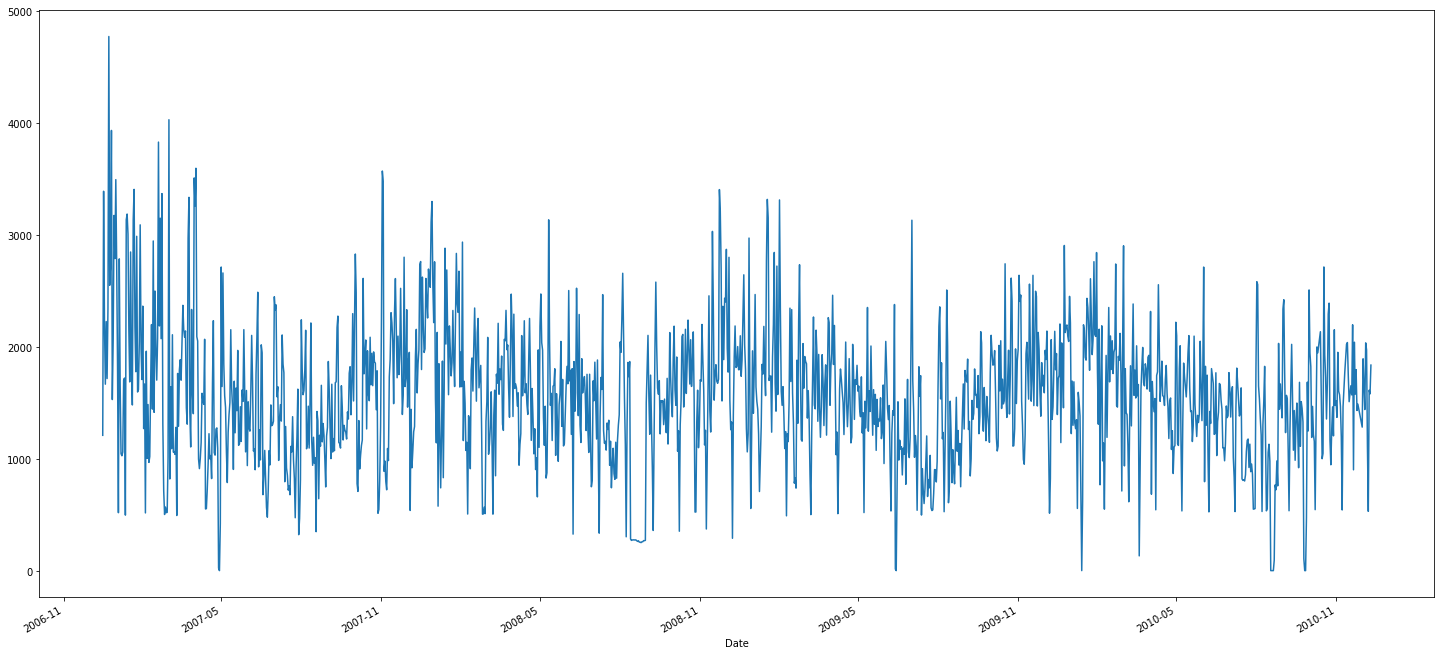

In [6]:
df.Global_active_power.plot(figsize=(25,12))

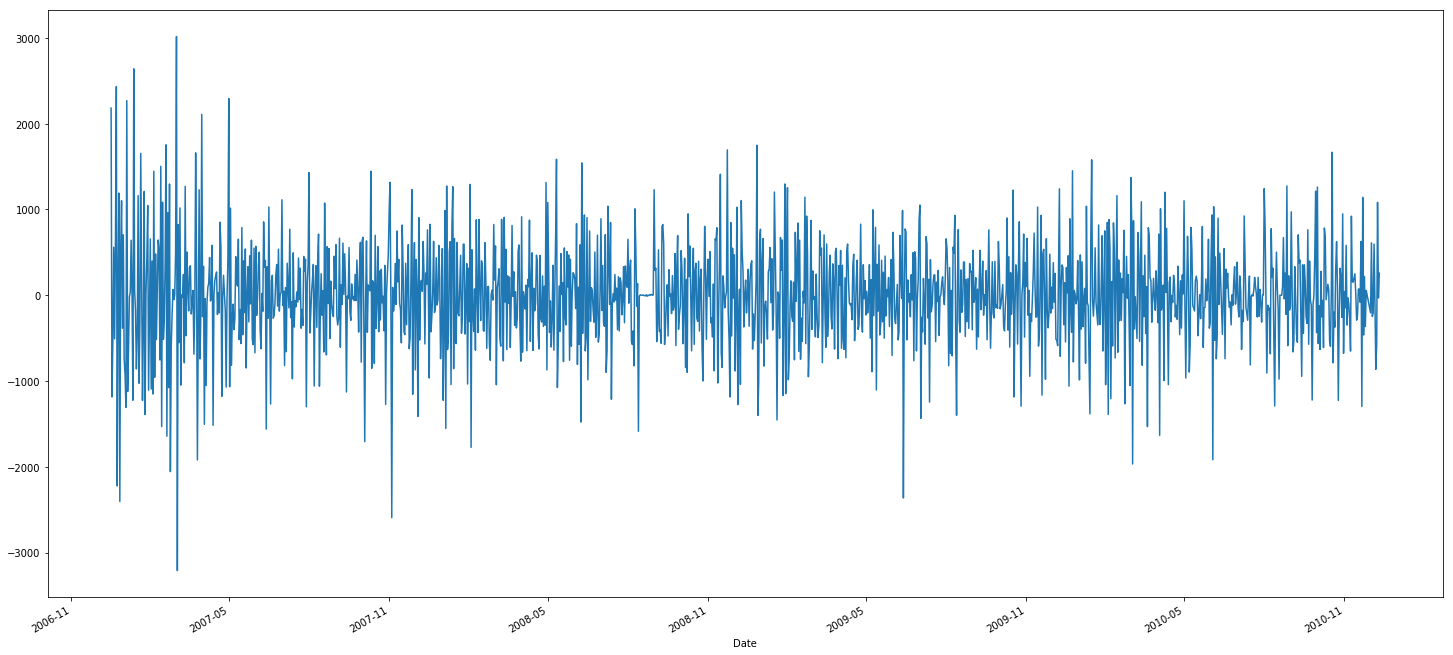

In [9]:
df.Global_active_power.diff().plot(figsize=(25,12))

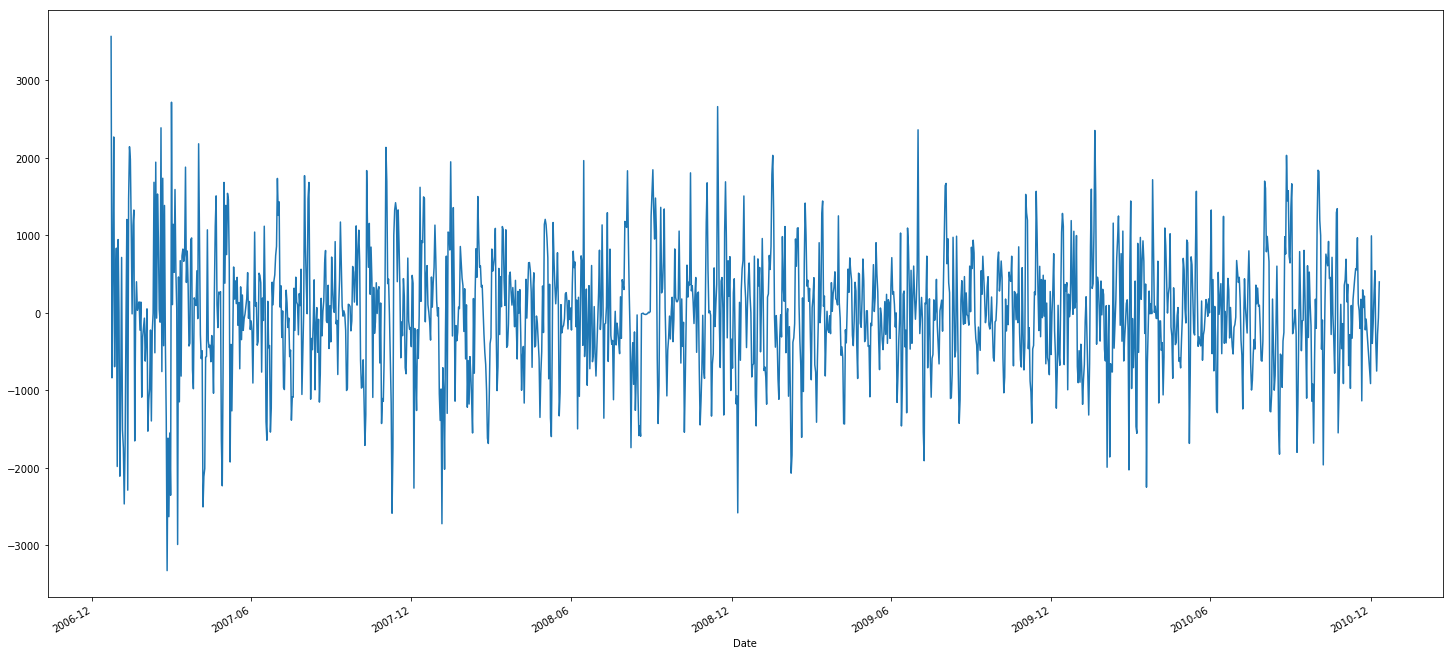

In [10]:
df.Global_active_power.diff(periods=7).plot(figsize=(25,12))

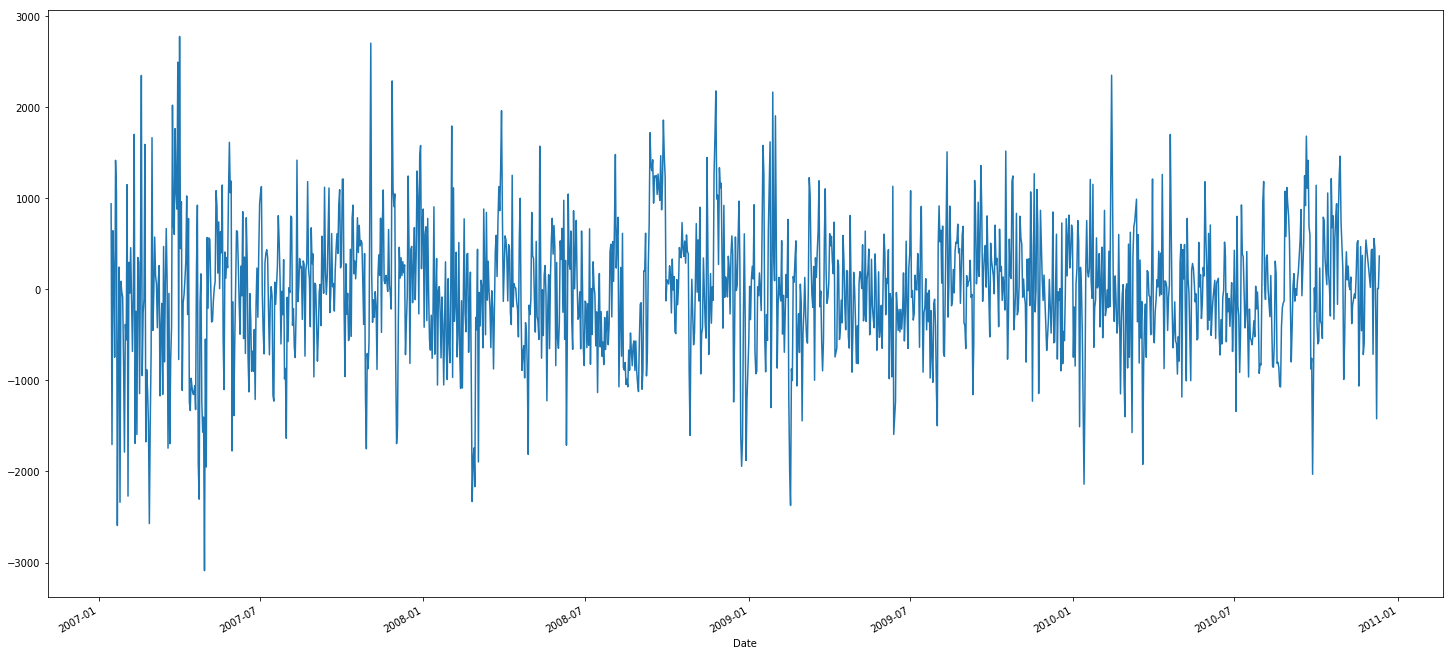

In [11]:
df.Global_active_power.diff(periods=30).plot(figsize=(25,12))